<h1 align='center'> Task2: Prediction using Unsupervised ML (Level - Beginner)</h1>
<h4 align='center'> From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. </h4>

<h3 align='right'> Eben Emmanuel </h3>

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Objective

In this Jupyter notebook we will be trying to predict the optimum number of clusters for the Iris data.

## 2. Loading the required Data

In [2]:
# Importing the data.
df = pd.read_csv('iris.csv')

In [3]:
# Viewing the imported data.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Removing the Id column.
df.drop(columns= ['Id'], inplace= True)

In [21]:
features = df.iloc[:,:-1]   # All the Independent Variables.
label = df.iloc[:,-1]       # Dependent Variable.

In [22]:
print("Dimensionality of the features dataset: ", features.shape)
print("Length of the label dataset: ", len(label))

Dimensionality of the features dataset:  (150, 4)
Length of the label dataset:  150


## 3. Exploratory Data Analysis

**PROBLEM: ** To predict the optimum number of clusters of species in the Iris dataset.

In [23]:
features.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Missing Values

- In any dataset we will initially try to find out where the missing data are. 

In [24]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<AxesSubplot:>

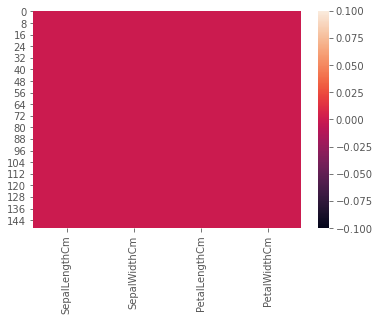

In [25]:
# To plot a graphic of missing values
import seaborn as sns
sns.heatmap(features.isna())

- It is important to visualise missing values, because then you will know what are the major NaN values in your dataset.
> Here we can see that for our dataset there are no missing values. Thus we can go ahead with our analysis.

## 4. Clustring

#### Elbow Plot

In [26]:
from sklearn.cluster import KMeans

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(features)
    sse.append(km.inertia_)

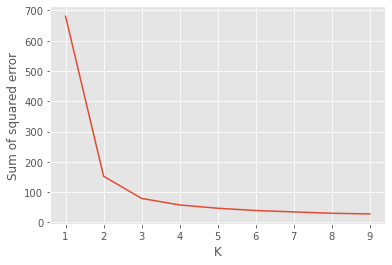

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

- Here we can see that the sum of squared error becomes 0 after K= 3 clusters. Thus we will be going with 3 clusters.

### Visual Representation of the Optimum Clusters

In [27]:
# Applying kmeans to the dataset / Creating the kmeans classifier
features = features.values
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)

- #### Clustring based on Sepal Length and Sepal Weight.

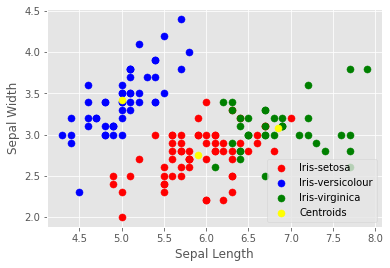

In [39]:
# Visualising the clusters
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

- #### Clustring based on Petal Length and Petal Weight.

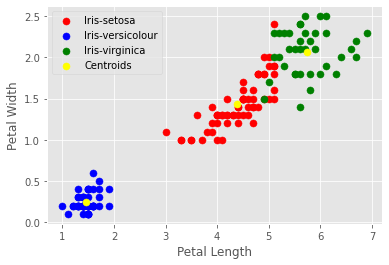

In [40]:
# Visualising the clusters
plt.scatter(features[y_kmeans == 0, 2], features[y_kmeans == 0, 3], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 2], features[y_kmeans == 1, 3], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 2], features[y_kmeans == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 50, c = 'yellow', label = 'Centroids')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()